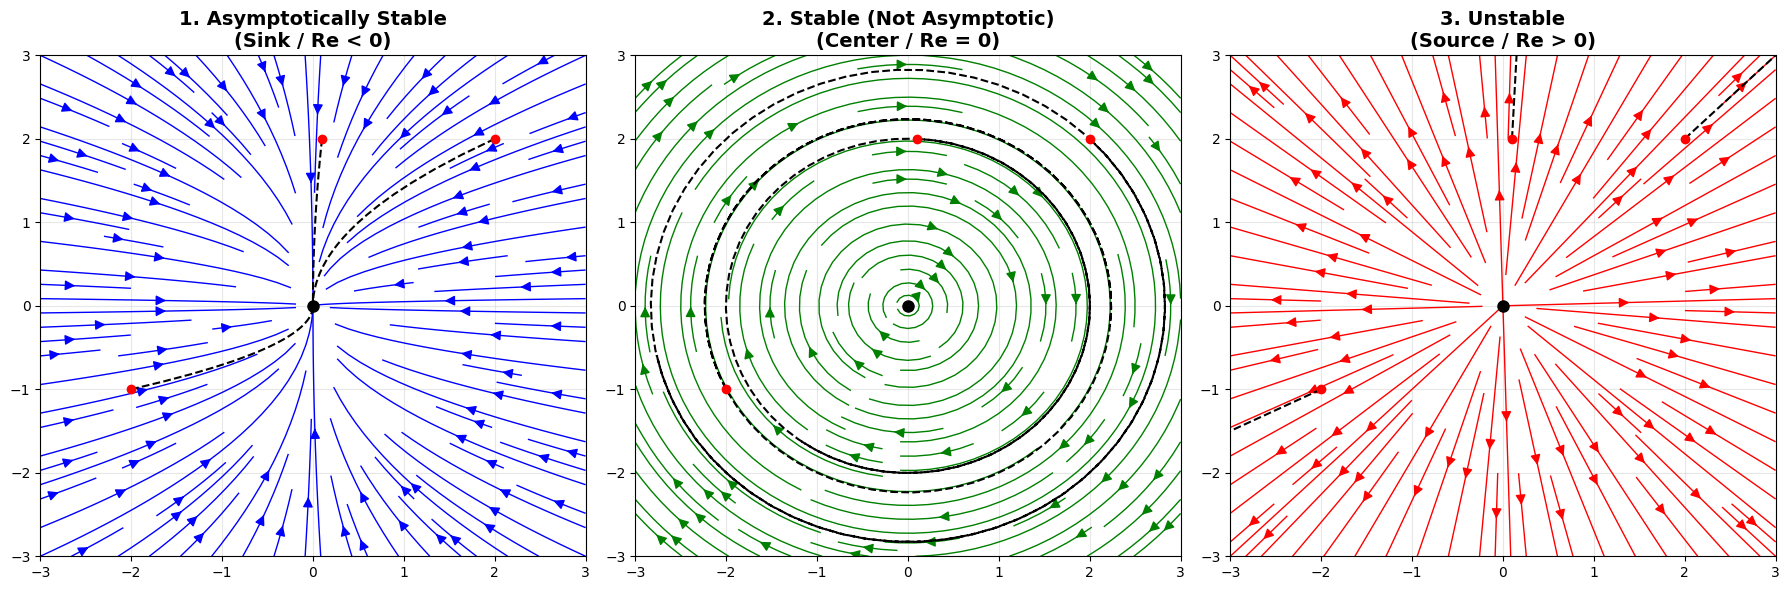

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义画图函数
def plot_phase_portrait(ax, A, title, color):
    # 创建网格点
    x = np.linspace(-3, 3, 20)
    y = np.linspace(-3, 3, 20)
    X, Y = np.meshgrid(x, y)
    
    # 计算每个点上的速度向量 (dx/dt, dy/dt) = A * [x, y]
    # u = dx/dt, v = dy/dt
    U = A[0, 0] * X + A[0, 1] * Y
    V = A[1, 0] * X + A[1, 1] * Y
    
    # 画出流线图 (Streamplot)
    ax.streamplot(X, Y, U, V, color=color, density=1.2, linewidth=1, arrowsize=1.5)
    
    # 画出几条具体的轨迹 (Trajectory) 作为示例
    # 比如从 (2,2) 和 (-2,1) 开始的点
    from scipy.integrate import odeint
    def system(state, t):
        return A @ state
    
    t = np.linspace(0, 10, 100)
    start_points = [[2, 2], [-2, -1], [0.1, 2]]
    
    for start in start_points:
        sol = odeint(system, start, t)
        ax.plot(sol[:, 0], sol[:, 1], 'k--', linewidth=1.5) # 黑色虚线是具体轨迹
        ax.plot(sol[0, 0], sol[0, 1], 'ro') # 红点是起点

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.grid(True, alpha=0.3)
    # 画出原点
    ax.plot(0, 0, 'ko', markersize=8, label='Equilibrium (0,0)')

# 设置画布
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- 情况 1: 渐近稳定 (Asymptotically Stable) ---
# 特征值: -2, -1 (都是负实数) -> "汇 (Sink)"
A_stable = np.array([[-2, 0], 
                     [0, -1]])
plot_phase_portrait(axes[0], A_stable, "1. Asymptotically Stable\n(Sink / Re < 0)", 'blue')

# --- 情况 2: 只是稳定 (Stable) ---
# 特征值: +/- i (纯虚数, 实部为0) -> "中心 (Center)"
A_center = np.array([[0, 1], 
                     [-1, 0]])
plot_phase_portrait(axes[1], A_center, "2. Stable (Not Asymptotic)\n(Center / Re = 0)", 'green')

# --- 情况 3: 不稳定 (Unstable) ---
# 特征值: 1, 1 (正实数) -> "源 (Source)"
A_unstable = np.array([[0.5, 0], 
                       [0, 0.5]])
plot_phase_portrait(axes[2], A_unstable, "3. Unstable\n(Source / Re > 0)", 'red')

plt.tight_layout()
plt.show()